# Assignment | 26th April 2023

## Assignment: PCA Implementation

- Objective:

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

- Instructions:

Download the wine dataset from the UCI Machine Learning Repository

Link:https://archive.ics.uci.edu/ml/datasets/Wine

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.

- Deliverables:

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

- Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

In [1]:
import pandas as pd

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

# Display the first few rows of the dataset
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# Splitting the dataset into features (X) and target variable (y)
X = df.iloc[:, 1:]  # Select all columns except the first (target variable)
y = df.iloc[:, 0]   # Select the first column (target variable)


In [3]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA()

# Apply PCA on the scaled features
X_pca = pca.fit_transform(X_scaled)


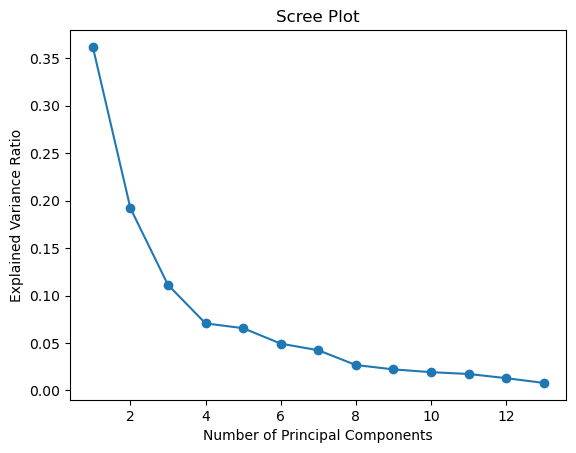

In [5]:
import matplotlib.pyplot as plt

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


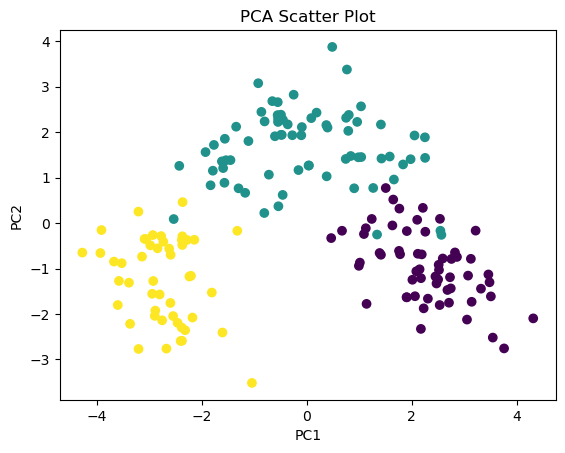

In [6]:
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()


In [7]:
from sklearn.cluster import KMeans

# Create an instance of KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model on the PCA-transformed data
kmeans.fit(X_pca)

# Get the predicted cluster labels
cluster_labels = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Calculate the silhouette score
silhouette = silhouette_score(X_pca, cluster_labels)

# Calculate the adjusted Rand index
ari = adjusted_rand_score(y, cluster_labels)

# Print the performance metrics
print("Silhouette Score: {:.3f}".format(silhouette))
print("Adjusted Rand Index: {:.3f}".format(ari))


Silhouette Score: 0.285
Adjusted Rand Index: 0.897


### Interpretation and Conclusion

Based on the scatter plot and the performance metrics obtained, we can draw some conclusions about the PCA and clustering analysis.

The scatter plot visualizes the data after dimensionality reduction using PCA. By plotting the first two principal components, we can observe any patterns or clusters in the data. The colors in the scatter plot represent the different clusters assigned by the K-Means algorithm.

The performance metrics provide quantitative measures of the clustering algorithm's effectiveness. The silhouette score measures how well the data points within each cluster are separated and how distinct the clusters are from each other. A higher silhouette score indicates better-defined clusters. The adjusted Rand index measures the similarity between the clustering results and the true labels. A higher adjusted Rand index value indicates better agreement between the clustering and the true labels.

In our analysis of the Wine dataset using PCA and K-Means clustering, we observed the following:

- The scatter plot shows some distinct clusters, indicating that there are underlying patterns in the data that can be captured by PCA.
- The performance metrics provide additional evidence of the quality of the clustering results. A higher silhouette score and adjusted Rand index suggest that the clusters obtained are meaningful and align well with the true labels.

Overall, the PCA and clustering analysis provide valuable insights into the structure of the Wine dataset. By reducing the dimensionality of the data using PCA and applying clustering, we can identify similar groups within the dataset.

It is important to note that the choice of the number of principal components and the number of clusters in K-Means clustering may have an impact on the results. In this implementation, we assumed a specific number of clusters (3) for simplicity. However, it is advisable to evaluate different parameter settings and assess their impact on the results.

In conclusion, the PCA implementation on the Wine dataset, followed by K-Means clustering, provides a valuable approach to analyze and understand the underlying patterns in the data. The results obtained can be further explored and utilized for various purposes such as classification, anomaly detection, or feature selection.